In [1]:
import os,sys
import numpy as np
import xarray as xr
import zarr
# plot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


# plota
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
CB_colors = {
	'blue':	'#377eb8',
	'orange':  '#ff7f00',
	'green':   '#4daf4a',
	'pink':	'#f781bf',
	'brown':   '#a65628',
	'purple':  '#984ea3',
	'gray':	'#999999',
	'red': 	'#e41a1c',
	'yellow':  '#dede00'
}

# from dask.distributed import Client
import multiprocessing.popen_spawn_posix
from distributed import Client

c = Client()
c


Client Scheduler: tcp://127.0.0.1:36775 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 2 Memory: 4.19 GB


In [2]:
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
mesh_hgr = xr.open_dataset(diri+'mesh_hgr.nc').squeeze()
tmask = mesh_hgr.tmask[0].drop_vars('nav_lev').drop_vars('time_counter')
nav_lon =  mesh_hgr.nav_lon
nav_lat =  mesh_hgr.nav_lat
e1t = mesh_hgr.e1t.fillna(0)
e2t = mesh_hgr.e2t.fillna(0)

centim = 1/2.54  # centimeters in inches
proj = ccrs.Robinson(central_longitude=200) #ccrs.Robinson()
crs = ccrs.PlateCarree()
crs
rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')
land  = cfeature.NaturalEarthFeature(name='land',scale='50m', category='physical',facecolor='grey')
label_style = {'size': 8, 'color': '#BDBDBD', 'weight': 'normal'}

In [3]:
dir_sc = os.environ['SCRATCH']
dir_work = os.environ['WORK']

diro = dir_work + "/ETUDE3/ENS_VAR_BUDGET/PLOTS/"

# load data function (for SLA and HALO)

In [4]:
def load_data(COMP):
    nexp1 = "EGAI"
    nexp2 = "EAI"
    nexp3 = "ES"
    dir_data = dir_work+ "/ETUDE3/ENS_VAR_BUDGET/data4analyses/"
    
    if COMP=="SLA":
        ds1 = xr.open_dataset(dir_data+nexp1+"/"+COMP+"/var_terms_39.zarr", engine="zarr")
        ds2 = xr.open_dataset(dir_data+nexp2+"/"+COMP+"/var_terms_39.zarr", engine="zarr")
        ds3 = xr.open_dataset(dir_data+nexp3+"/"+COMP+"/var_terms_39.zarr", engine="zarr")
    else:
        ds1 = xr.open_dataset(dir_data+nexp1+"/"+COMP+"/var_terms_39_0_bottom.zarr", engine="zarr")
        ds2 = xr.open_dataset(dir_data+nexp2+"/"+COMP+"/var_terms_39_0_bottom.zarr", engine="zarr")
        ds3 = xr.open_dataset(dir_data+nexp3+"/"+COMP+"/var_terms_39_0_bottom.zarr", engine="zarr")
        
    # compute the difference
    DIFFEGAI_ES  = ds1 - ds3
    DIFFEGAI_EAI = ds1 - ds2
    DIFFEAI_ES   = ds2 - ds3
    
    ############################ Compute the percentage
    # EGAI - ES 
    intrinsic_var_DIFF_perc_EGAI_ES = (DIFFEGAI_ES.intrinsic_var /  ds3.tot_var) *100
    bias_var_DIFF_perc_EGAI_ES = (DIFFEGAI_ES.res_var /  ds3.tot_var) *100
    
    # EAI - ES 
    intrinsic_var_DIFF_perc_EAI_ES = ( DIFFEAI_ES.intrinsic_var /  ds3.tot_var) *100
    bias_var_DIFF_perc_EAI_ES = (DIFFEAI_ES.res_var /  ds3.tot_var) *100
    
    # EGAI - EAI 
    intrinsic_var_DIFF_perc_EGAI_EAI = (DIFFEGAI_EAI.intrinsic_var /  ds3.tot_var) *100
    bias_var_DIFF_perc_EGAI_EAI = ( DIFFEGAI_EAI.res_var /  ds3.tot_var) *100

    return [[intrinsic_var_DIFF_perc_EGAI_ES, bias_var_DIFF_perc_EGAI_ES],\
            [intrinsic_var_DIFF_perc_EAI_ES, bias_var_DIFF_perc_EAI_ES],\
            [intrinsic_var_DIFF_perc_EGAI_EAI, bias_var_DIFF_perc_EGAI_EAI]]

In [5]:
# data_SLA= load_data("SLA")
data_SLA= load_data("THERMO")

data_HALO= load_data("HALO")


In [47]:
# ds_simask = xr.open_dataset(dir_work+"/ETUDE3/ENS_VAR_BUDGET/raw_data/"+nexp1+"/"+nexp1+"_SIMASK15_E1980_2018.zarr", engine="zarr").SIMASK15_E
# sum_simsk = ds_simask.sum(('ens','time_counter')).compute()
# si_mask_nexp1 = (sum_simsk.where(sum_simsk==390,0)/390)
# si_mask_nexp1 = si_mask_nexp1.where(tmask)

In [5]:
# # EGAI - ES
# tot_var_DIFFEGAI_ES = DIFFEGAI_ES.tot_var 
# forced_var_DIFFEGAI_ES = DIFFEGAI_ES.forced_var
# internal_var_DIFFEGAI_ES = DIFFEGAI_ES.intrinsic_var - DIFFEGAI_ES.res_var

# # EAI - ES
# tot_var_DIFFEAI_ES = DIFFEAI_ES.tot_var 
# forced_var_DIFFEAI_ES = DIFFEAI_ES.forced_var
# internal_var_DIFFEAI_ES = DIFFEAI_ES.intrinsic_var - DIFFEAI_ES.res_var

# # EGAI - EAI
# tot_var_DIFFEGAI_EAI = DIFFEGAI_EAI.tot_var 
# forced_var_DIFFEGAI_EAI = DIFFEGAI_EAI.forced_var
# internal_var_DIFFEGAI_EAI = DIFFEGAI_EAI.intrinsic_var - DIFFEGAI_EAI.res_var

## compute the percentage for the internal: useless for this plot
# internal_var_DIFF_perc_EGAI_ES  = (internal_var_DIFFEGAI_ES  /  ds3.tot_var) *100
# internal_var_DIFF_perc_EAI_ES  = ( internal_var_DIFFEAI_ES /  ds3.tot_var) *100
# internal_var_DIFF_perc_EGAI_EAI  = (internal_var_DIFFEGAI_EAI /  ds3.tot_var) *100


In [6]:
# # values for the manuscript

# dir_data = dir_work+ "/ETUDE3/ENS_VAR_BUDGET/data4analyses/"
# my_regions_masks = xr.open_zarr(dir_data+"my_regions_masks.zarr")

# mask_2use= my_regions_masks.mask_kur

# # compute the weight 
# cellArea = (e1t * e2t).load()
# # masking the cells we ignore in this study (land and sea ice cells)
# oceanArea = cellArea.where(mask_2use, drop=True)
# totalOceanArea = oceanArea.sum()
# Weight = oceanArea / totalOceanArea

# print('total')
# print((internal_var_DIFF_perc_EGAI_ES.where(mask_2use, drop=True) *Weight).sum().values)
# print((internal_var_DIFF_perc_EAI_ES.where(mask_2use, drop=True) *Weight).sum().values)
# print((internal_var_DIFF_perc_EGAI_EAI.where(mask_2use, drop=True) *Weight).sum().values)

# print('intrinsic')
# print((intrinsic_var_DIFF_perc_EGAI_ES.where(mask_2use, drop=True) *Weight).sum().values)
# print((intrinsic_var_DIFF_perc_EAI_ES.where(mask_2use, drop=True) *Weight).sum().values)
# print((intrinsic_var_DIFF_perc_EGAI_EAI.where(mask_2use, drop=True) *Weight).sum().values)

# print('bias')
# print((bias_var_DIFF_perc_EGAI_ES.where(mask_2use, drop=True) *Weight).sum().values)
# print((bias_var_DIFF_perc_EAI_ES.where(mask_2use, drop=True) *Weight).sum().values)
# print((bias_var_DIFF_perc_EGAI_EAI.where(mask_2use, drop=True) *Weight).sum().values)


total
7.571012445899319
1.1917591832712309
6.3792532626280885
intrinsic
4.368340740725509
-2.9551347877692544
7.323475528494765
bias
-3.2026717051738087
-4.146893971040486
0.9442222658666762


# PLOT

In [6]:
lim_HALO = 300 # % HALO
lim_SLA = 60 # % SSH

cmap34 = cm.RdYlBu_r 

dir_data = dir_work+ "/ETUDE3/ENS_VAR_BUDGET/data4analyses/"
my_regions_masks = xr.open_zarr(dir_data+"my_regions_masks.zarr")


In [7]:
MKE_Emean_kur1m_ES = xr.open_zarr(dir_data+"ES"+"/MKE/"+"MKE_Emean_1m.zarr").MKE_Emean

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


figure8_for_paper.png


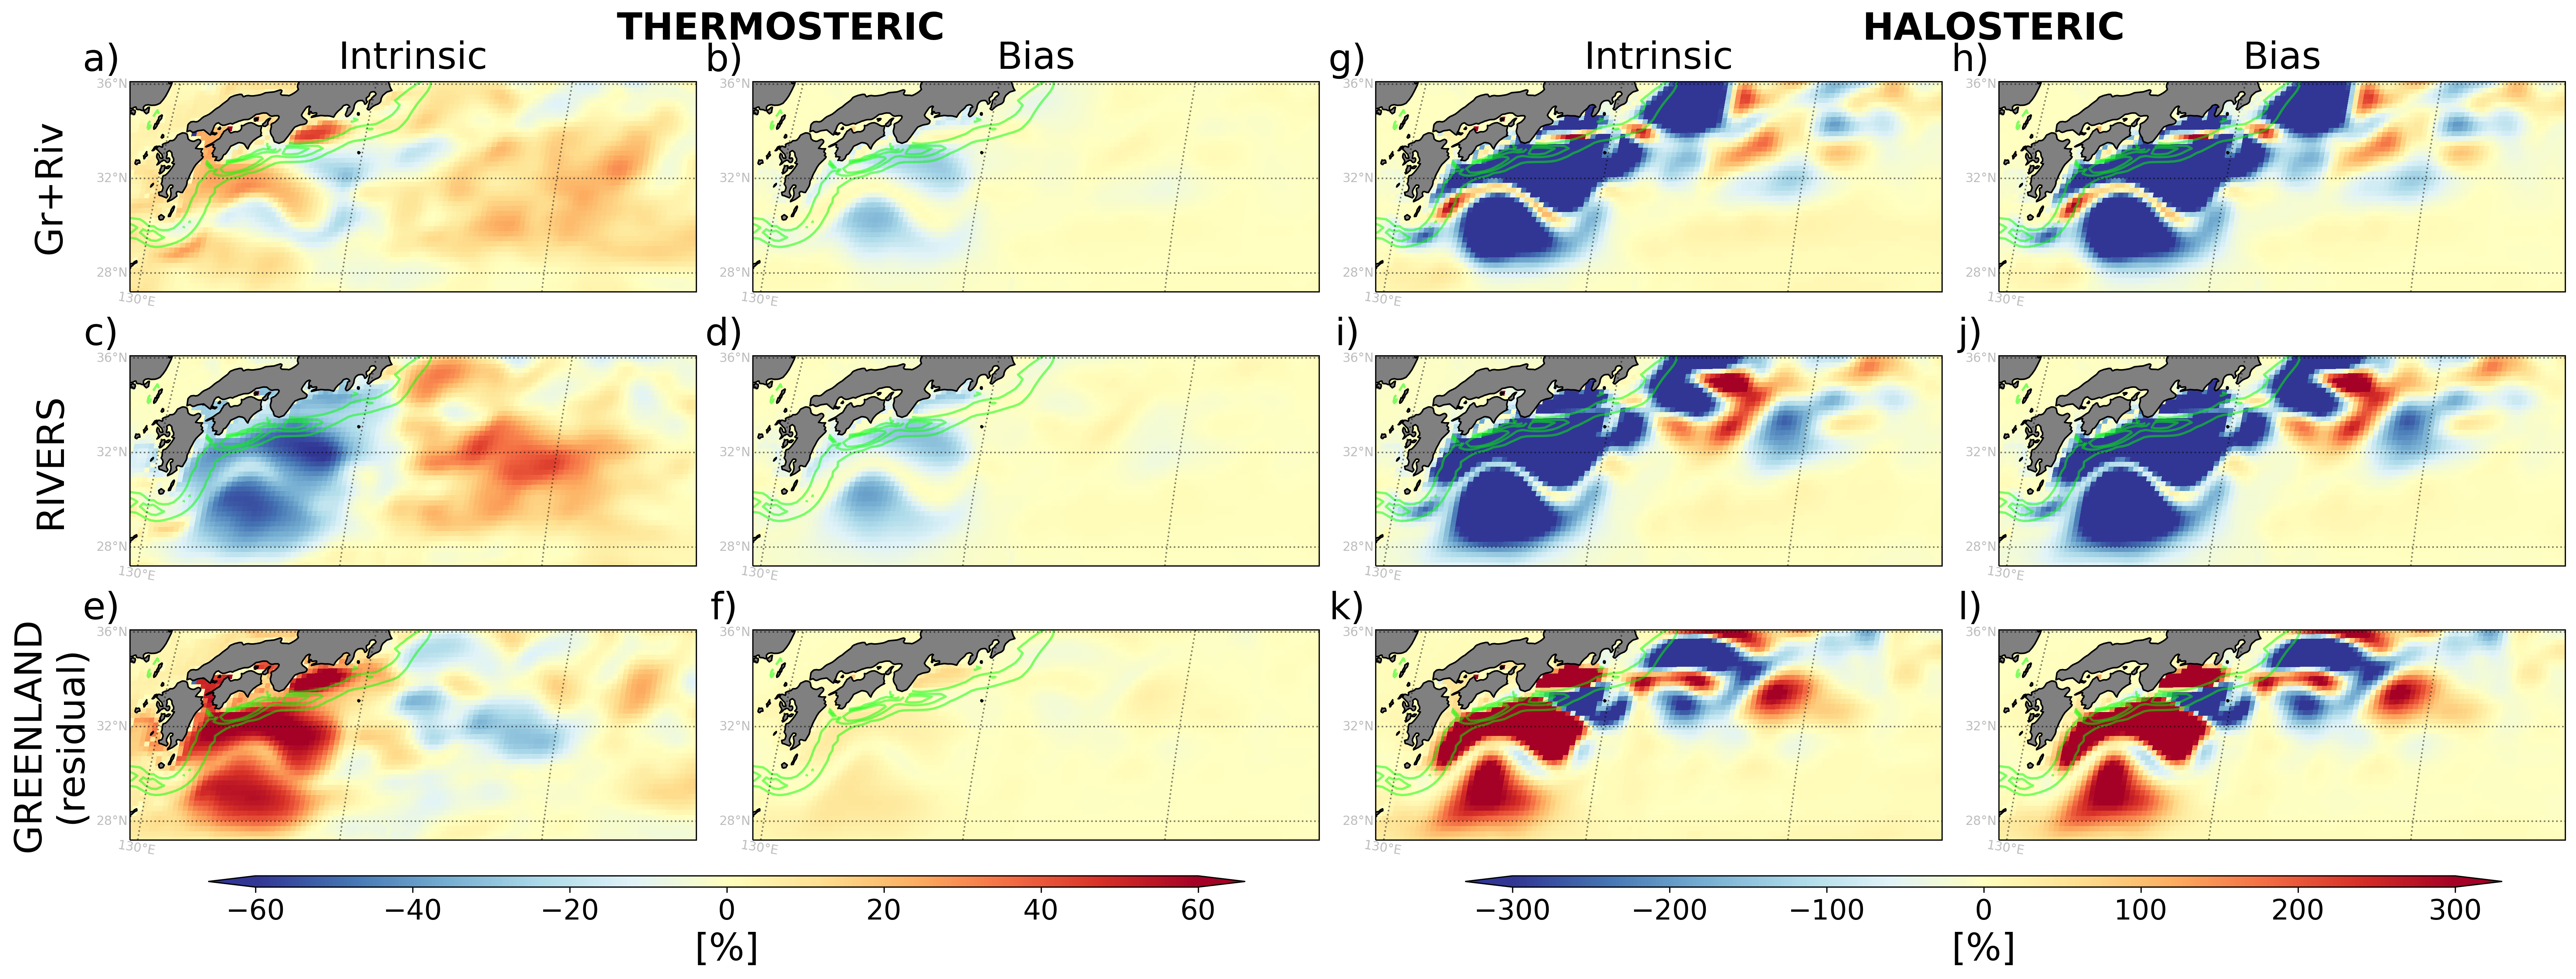

In [8]:
centim = 1/2.54  # centimeters in inches
fig, [(axa,axb,axc, ax1),(axd,axe,axf, ax2),(axg,axh,axi, ax3)] = plt.subplots(3, 4,figsize=(28,10),facecolor='white', \
                                                                             dpi=300,subplot_kw={'projection': proj})
plt.subplots_adjust(wspace=0.1, hspace=-0.1)
axa.text(-0.14, 0.5, "Gr+Riv", fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axa.transAxes)
axd.text(-0.14, 0.5,  "RIVERS", fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axd.transAxes)
axg.text(-0.14, 0.5, "GREENLAND\n(residual)", fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axg.transAxes)

axa.set_title("Intrinsic", fontsize=24) 
axb.set_title("Bias", fontsize=24) 
axc.set_title("Intrinsic", fontsize=24) 
ax1.set_title("Bias", fontsize=24) 

axa.text(-0.05, 1.1, 'a)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axa.transAxes)
axb.text(-0.05, 1.1, 'b)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axb.transAxes)
axc.text(-0.05, 1.1, 'g)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axc.transAxes)
ax1.text(-0.05, 1.1, 'h)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

axd.text(-0.05, 1.1, 'c)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axd.transAxes)
axe.text(-0.05, 1.1, 'd)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axe.transAxes)
axf.text(-0.05, 1.1, 'i)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axf.transAxes)
ax2.text(-0.05, 1.1, 'j)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

axg.text(-0.05, 1.1, 'e)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axg.transAxes)
axh.text(-0.05, 1.1, 'f)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axh.transAxes)
axi.text(-0.05, 1.1, 'k)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axi.transAxes)
ax3.text(-0.05, 1.1, 'l)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)

axa.text(0.86, 1.25, 'THERMOSTERIC', fontsize=24,weight='bold', verticalalignment='center', transform=axa.transAxes)
axc.text(0.86, 1.25, 'HALOSTERIC', fontsize=24,weight='bold', verticalalignment='center', transform=axc.transAxes)


for ax_name in [axa,axb,axc,axd,axe,axf,axg,axh,axi,ax1,ax2,ax3]:
    ax_name.set_extent([-230.4, -203.7, 27.2, 36.1], crs=ccrs.PlateCarree())
    # ax_name.set_extent([-233, -202, 26, 37], crs=ccrs.PlateCarree())
    gl = ax_name.gridlines(color='k',alpha=0.5, linestyle='--',linewidth=0.33,lw=1,ls=':', draw_labels=True,crs=ccrs.PlateCarree())
    gl.bottom_labels = True; gl.right_labels = False
    gl.xlabel_style = label_style; gl.ylabel_style = label_style
    gl.ylocator = mticker.FixedLocator([28, 32, 36]); gl.xformatter = LONGITUDE_FORMATTER
    gl.xlocator = mticker.FixedLocator([130, 140, 150]); gl.yformatter = LATITUDE_FORMATTER
    ax_name.add_feature(land, edgecolor='black')
    clr2 = ax_name.add_feature(rivers,alpha=0.3,facecolor='none',edgecolor='blue',zorder=6)
    # ax_name.contour(nav_lon,nav_lat,my_regions_masks.mask_kur,1,colors="magenta",transform=crs)
    ax_name.contour(nav_lon,nav_lat,MKE_Emean_kur1m_ES.where(nav_lon<0),levels=np.arange(0,0.4,0.1), transform=crs, alpha=0.5, colors='lime') # for HALO
    ax_name.contour(nav_lon,nav_lat,MKE_Emean_kur1m_ES.where(nav_lon>0),levels=np.arange(0,0.4,0.1), transform=crs, alpha=0.5, colors='lime') # for HALO

############################################################################### SLA ########################################################################## 
#--------------------- first line --------------------------------------
cs= axa.pcolormesh(nav_lon, nav_lat, data_SLA[0][0], shading='flat',cmap =cmap34, transform=crs, vmin =-lim_SLA, vmax=lim_SLA)
cs= axb.pcolormesh(nav_lon, nav_lat, data_SLA[0][1], shading='flat',cmap = cmap34, transform=crs, vmin =-lim_SLA, vmax=lim_SLA)

# # #-------------------- second line --------------------------------------
cs= axd.pcolormesh(nav_lon, nav_lat, data_SLA[1][0], shading='flat',cmap =cmap34, transform=crs,  vmin =-lim_SLA, vmax=lim_SLA)
cs= axe.pcolormesh(nav_lon, nav_lat, data_SLA[1][1], shading='flat',cmap = cmap34, transform=crs, vmin =-lim_SLA, vmax=lim_SLA)

# # #----------------- third line --------------------------------------
cs= axg.pcolormesh(nav_lon, nav_lat, data_SLA[2][0], shading='flat',cmap =cmap34, transform=crs,vmin =-lim_SLA, vmax=lim_SLA)
cs= axh.pcolormesh(nav_lon, nav_lat, data_SLA[2][1], shading='flat',cmap =cmap34, transform=crs, vmin =-lim_SLA, vmax=lim_SLA)

#--------------------- color bar  --------------------------------------
fig.subplots_adjust(bottom=0.12)
cbar_ax = fig.add_axes([0.15, 0.12, 0.33, 0.01])  #(left, bottom, width, height)
cbar = fig.colorbar(cs,extend='both', cax=cbar_ax, orientation='horizontal') # pad = 0.025, shrink=0.9)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('[%]', fontsize=24)


############################################################################### HALO ########################################################################## 
#--------------------- first line--------------------------------------
cs= axc.pcolormesh(nav_lon, nav_lat, data_HALO[0][0], shading='flat',cmap =cmap34, transform=crs, vmin =-lim_HALO, vmax=lim_HALO)
cs= ax1.pcolormesh(nav_lon, nav_lat, data_HALO[0][1], shading='flat',cmap = cmap34, transform=crs, vmin =-lim_HALO, vmax=lim_HALO)

# # #-------------------- second line --------------------------------------
cs= axf.pcolormesh(nav_lon, nav_lat, data_HALO[1][0], shading='flat',cmap =cmap34, transform=crs,  vmin =-lim_HALO, vmax=lim_HALO)
cs= ax2.pcolormesh(nav_lon, nav_lat, data_HALO[1][1], shading='flat',cmap = cmap34, transform=crs, vmin =-lim_HALO, vmax=lim_HALO)

# # #----------------- third line --------------------------------------
cs= axi.pcolormesh(nav_lon, nav_lat, data_HALO[2][0], shading='flat',cmap =cmap34, transform=crs,vmin =-lim_HALO, vmax=lim_HALO)
cs= ax3.pcolormesh(nav_lon, nav_lat, data_HALO[2][1], shading='flat',cmap =cmap34, transform=crs, vmin =-lim_HALO, vmax=lim_HALO)

############-------------------color scale-------------------------
fig.subplots_adjust(bottom=0.12)
cbar_ax = fig.add_axes([0.55, 0.12, 0.33, 0.01])  #(left, bottom, width, height)
cbar = fig.colorbar(cs,extend='both', cax=cbar_ax, orientation='horizontal') # # pad = 0.025
cbar.ax.tick_params(labelsize=18)
cbar.set_label('[%]', fontsize=24)

# namo = "figure9_kur_box_intrinsic_bias.png"
#namo = "figure9_for_soutenance.png"
namo = "figure8_for_paper.png"

print(namo)
# fig.tight_layout(pad=0.5) #pad=0, h_pad=5, w_pad=0)
plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none'
# plt.close(fig)

In [9]:
diro+namo

'/lustre/fswork/projects/rech/cli/uor98hu/ETUDE3/ENS_VAR_BUDGET/PLOTS/figure8_for_paper.png'

# old figure only two column

In [ ]:
centim = 1/2.54  # centimeters in inches

fig, [(axb,axc),(axe,axf),(axh,axi)] = plt.subplots(3, 2,figsize=(15, 10),facecolor='white', dpi=300,subplot_kw={'projection': proj})
plt.subplots_adjust(wspace=0.1, hspace=0)

axb.text(-0.05, 1.05, 'a)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axb.transAxes)
axc.text(-0.05, 1.05, 'b)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axc.transAxes)

axe.text(-0.05, 1.05, 'c)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axe.transAxes)
axf.text(-0.05, 1.05, 'd)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axf.transAxes)

axh.text(-0.05, 1.05, 'e)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axh.transAxes)
axi.text(-0.05, 1.05, 'f)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axi.transAxes)

axb.text(-0.14, 0.5, "Gr+Riv", fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axb.transAxes)
axe.text(-0.14, 0.5,  "RIVERS", fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axe.transAxes)
axh.text(-0.14, 0.5, "GREENLAND", fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axh.transAxes)

axb.set_title("Intrinsic", fontsize=24) 
axc.set_title("Bias", fontsize=24) 

for ax_name in [axb,axc,axe,axf,axh,axi]:
    ax_name.set_extent([-233, -202, 26, 37], crs=ccrs.PlateCarree())
    gl = ax_name.gridlines(color='k',alpha=0.5, linestyle='--',linewidth=0.33,lw=1,ls=':', draw_labels=True,crs=ccrs.PlateCarree())
    gl.bottom_labels = True; gl.right_labels = False
    gl.xlabel_style = label_style; gl.ylabel_style = label_style
    gl.ylocator = mticker.FixedLocator([28, 32, 36]); gl.xformatter = LONGITUDE_FORMATTER
    gl.xlocator = mticker.FixedLocator([130, 140, 150]); gl.yformatter = LATITUDE_FORMATTER
    ax_name.add_feature(land, edgecolor='black')
    clr2 = ax_name.add_feature(rivers,alpha=0.3,facecolor='none',edgecolor='blue',zorder=6)
    ax_name.contour(nav_lon,nav_lat,my_regions_masks.mask_kur,1,colors="magenta",transform=crs)

    ax_name.contour(nav_lon,nav_lat,MKE_Emean_kur1m_ES.where(nav_lon<0),levels=np.arange(0,0.4,0.1), transform=crs, alpha=0.5, colors='darkgreen') # for SLA
    ax_name.contour(nav_lon,nav_lat,MKE_Emean_kur1m_ES.where(nav_lon>0),levels=np.arange(0,0.4,0.1), transform=crs, alpha=0.5, colors='darkgreen') # for SLA
    # ax_name.contour(nav_lon,nav_lat,MKE_Emean_kur1m_ES.where(nav_lon<0),levels=np.arange(0,0.4,0.1), transform=crs, alpha=0.5, colors='lime') # for HALO
    # ax_name.contour(nav_lon,nav_lat,MKE_Emean_kur1m_ES.where(nav_lon>0),levels=np.arange(0,0.4,0.1), transform=crs, alpha=0.5, colors='lime') # for HALO
 
#--------------------- premiere ligne --------------------------------------
cs= axb.pcolormesh(nav_lon, nav_lat, intrinsic_var_DIFF_perc_EGAI_ES, shading='flat',cmap =cmap34, transform=crs, vmin =-lim_l4, vmax=lim_l4)
cs= axc.pcolormesh(nav_lon, nav_lat, bias_var_DIFF_perc_EGAI_ES, shading='flat',cmap = cmap34, transform=crs, vmin =-lim_l4, vmax=lim_l4)

# # #-------------------- deuxieme ligne --------------------------------------
cs= axe.pcolormesh(nav_lon, nav_lat, intrinsic_var_DIFF_perc_EAI_ES, shading='flat',cmap =cmap34, transform=crs,  vmin =-lim_l4, vmax=lim_l4)
cs= axf.pcolormesh(nav_lon, nav_lat, bias_var_DIFF_perc_EAI_ES, shading='flat',cmap = cmap34, transform=crs, vmin =-lim_l4, vmax=lim_l4)

# # #----------------- troisieme ligne --------------------------------------
cs= axh.pcolormesh(nav_lon, nav_lat, intrinsic_var_DIFF_perc_EGAI_EAI, shading='flat',cmap =cmap34, transform=crs,vmin =-lim_l4, vmax=lim_l4)
cs= axi.pcolormesh(nav_lon, nav_lat, bias_var_DIFF_perc_EGAI_EAI, shading='flat',cmap =cmap34, transform=crs, vmin =-lim_l4, vmax=lim_l4)

############--------------------------------------------
fig.subplots_adjust(bottom=0.18)
cbar_ax = fig.add_axes([0.15, 0.16, 0.7, 0.01])  #(left, bottom, width, height)

ticklabels=np.arange(-0.5,2.5,0.5)
new_tickslabels = [np.round(10**y,1) for y in ticklabels]

cbar = fig.colorbar(cs,extend='both', cax=cbar_ax, orientation='horizontal') #, ticks=ticklabels) # pad = 0.025, shrink=0.9) ticks=bounds,
cbar.ax.tick_params(labelsize=18)
# cbar.set_ticklabels(new_tickslabels)
# cbar.ax.set_title('$log_{10}(cm^{2})$',size=14)
cbar.set_label('[%]', fontsize=24)
# cbar.set_ticks(ticks=np.arange(-0.5,2.5,0.5))

namo = COMP+"_DIFF_figure_with_bias_kur_box.png"

print(namo)
# fig.tight_layout(pad=0.5) #pad=0, h_pad=5, w_pad=0)
plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none'
# plt.close(fig)